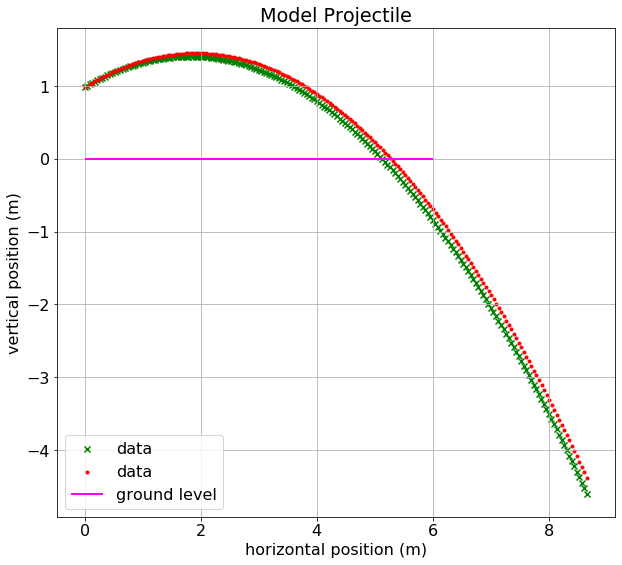

The projectile lands between 0.8231 and 0.8302 (s)
It's height is 0.0292 and -0.0076 (m) at those times


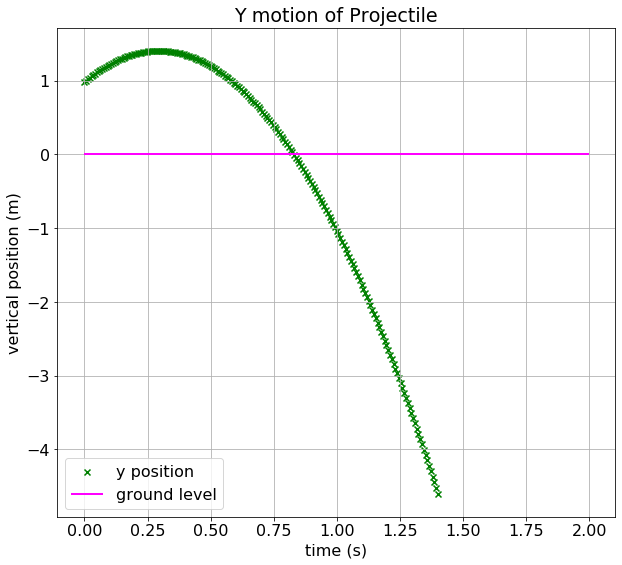

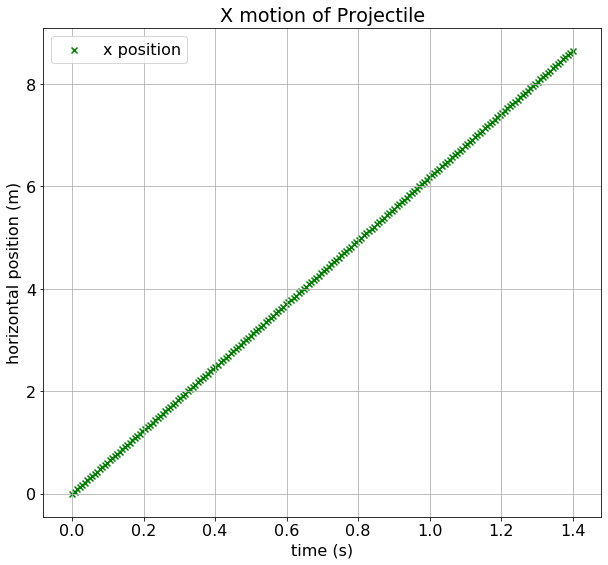

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.polynomial import polynomial as ply
from scipy.optimize import fsolve


# initial conditions
initialvelocity = 6.82 #fix
initialy = .98 # initial height in m
initialx = 0. # initial horizontal location
launch_angle_deg = 25. #0.0174533
anglerad = launch_angle_deg*np.pi/180.
velinitialy = initialvelocity*np.sin(anglerad)
velinitialx = initialvelocity*np.cos(anglerad)
velocity_variability = 0.01 # percentage variability in velocity
angular_uncertainty = 0.02 # launch angle uncertainty in radians

# variability plots
velhighy =  initialvelocity*(1.+ velocity_variability)*np.sin(anglerad+angular_uncertainty)
velhighx =  initialvelocity*(1.+ velocity_variability)*np.cos(anglerad+angular_uncertainty)

# useful constants
gravity_moon = 1.62
gravity_earth = 9.81
accely = - gravity_earth

# anglerad


# generate x values for model of data
maxtime = 1.4
numpoints = 200
modeltime = np.linspace(0.,maxtime,numpoints)

# create model x andy position lists that matches the model time list
modely = np.full_like(modeltime,0)
modelx = np.full_like(modeltime,0)
highy = np.full_like(modeltime,0)
highx = np.full_like(modeltime,0)
    
for i, time in enumerate(modeltime):
    modely[i] = initialy + velinitialy*time + 0.5*accely*time**2
    modelx[i] = initialx + velinitialx*time
    highy[i] = initialy + velhighy*time + 0.5*accely*time**2
    highx[i] = initialx + velhighx*time
    #print("testing the output of the loop;", modely, modelx)

fig2, ax2 = plt.subplots()

# plot the basic projectile model
ax2.scatter(modelx, modely,
            marker = 'x', color = 'green',
            label = "data")

# plot the model for my possible higher speed and angle
ax2.scatter(highx, highy,
            marker = '.', color = 'red',
            label = "data")

# draw a horizontal line across the plot to show the ground
ax2.hlines(0, 0, 6,
         color = 'magenta', linestyle = '-',
         linewidth = 2., label = "ground level")

plt.rcParams.update({'font.size': 16}) # make labels easier to read
ax2.set(xlabel='horizontal position (m)', ylabel='vertical position (m)',
       title='Model Projectile')

fig2.set_size_inches(10, 9)
ax2.grid()

plt.legend(loc= 3)
plt.show()

below_ground_elements = np.where(modely < 0.)
just_after_contact = np.min(below_ground_elements)
contact = np.where ()
print("The projectile lands between %.4f and %.4f (s)" % 
      (modeltime[just_after_contact-1],
       modeltime[just_after_contact]))

print("It's height is %.4f and %.4f (m) at those times" % 
      (modely[just_after_contact-1],
       modely[just_after_contact]))

fig3, ax3 = plt.subplots()
ax3.scatter(modeltime, modely,
            marker = 'x', color = 'green',
            label = "y position")

# draw a horizontal line across the plot to show the ground
ax3.hlines(0, 0, 2,
         color = 'magenta', linestyle = '-',
         linewidth = 2., label = "ground level")

plt.rcParams.update({'font.size': 16}) # make labels easier to read
ax3.set(xlabel='time (s)', ylabel='vertical position (m)',
       title='Y motion of Projectile')

fig3.set_size_inches(10, 9)
ax3.grid()

plt.legend(loc= 3)
plt.show()

fig4, ax4 = plt.subplots()
ax4.scatter(modeltime, modelx,
            marker = 'x', color = 'green',
            label = "x position")

# draw a horizontal line across the plot to show the ground
#ax4.hlines(0, 0, 1,
#         color = 'magenta', linestyle = '-',
#         linewidth = 2., label = "ground level")

plt.rcParams.update({'font.size': 16}) # make labels easier to read
ax4.set(xlabel='time (s)', ylabel='horizontal position (m)',
       title='X motion of Projectile')

fig4.set_size_inches(10, 9)
ax4.grid()

plt.legend(loc= 2)
plt.show()